<a href="https://colab.research.google.com/github/BigOsvaap/MexicanSignLanguageAlphabetRecognition/blob/main/Sign%20Languaje%20-%20Static%20Alphabet%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting files from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Importing libraries





In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Counting the files with JPG extension in data directory

In [ ]:
import pathlib

data_dir = '/content/gdrive/My Drive/IA Projects/Sign Languaje - Static Alphabet Recognition/SignLanguaje'
data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))
print('Total de imágenes: ', image_count)

Total de imágenes:  6300


Input layer of CNN

In [ ]:
#Input of CNN

batch_size = 32
img_height = 180
img_width = 180

# Dataset
Creating training dataset from images in directory

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6300 files belonging to 21 classes.
Using 5040 files for training.


Validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6300 files belonging to 21 classes.
Using 1260 files for validation.


Classes in dataset and creating label file

In [ ]:
class_names = train_ds.class_names
print(class_names)


f = open('labels.txt', 'w')
labels = map(lambda x:x+'\n', class_names)
f.writelines(labels)
f.close()

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y']


Sample of the images in the dataset

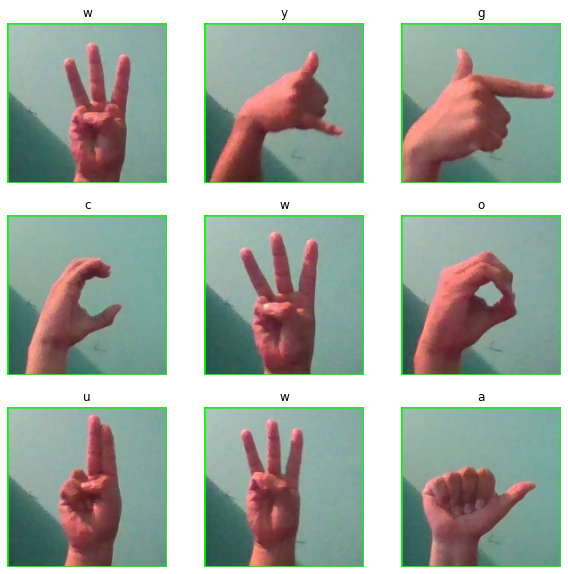

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Properties of the training dataset

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


#Convolutional Neuronal Network

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 21

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#Training neuronal network
Setting optimizer, loss function and metrics of the neuronal network 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)       

Training neuronal network

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
158/158 [==============================] - 166s 963ms/step - loss: 2.3535 - accuracy: 0.2970 - val_loss: 0.9442 - val_accuracy: 0.7127
Epoch 2/10
158/158 [==============================] - 148s 937ms/step - loss: 0.7083 - accuracy: 0.7827 - val_loss: 0.4478 - val_accuracy: 0.8508
Epoch 3/10
158/158 [==============================] - 148s 939ms/step - loss: 0.2811 - accuracy: 0.9114 - val_loss: 0.2472 - val_accuracy: 0.9175
Epoch 4/10
158/158 [==============================] - 148s 935ms/step - loss: 0.1585 - accuracy: 0.9528 - val_loss: 0.2088 - val_accuracy: 0.9294
Epoch 5/10
158/158 [==============================] - 148s 936ms/step - loss: 0.0964 - accuracy: 0.9714 - val_loss: 0.1303 - val_accuracy: 0.9548
Epoch 6/10
158/158 [==============================] - 148s 938ms/step - loss: 0.0472 - accuracy: 0.9867 - val_loss: 0.1569 - val_accuracy: 0.9540
Epoch 7/10
158/158 [==============================] - 147s 933ms/step - loss: 0.0579 - accuracy: 0.9811 - val_loss: 0.1736 -

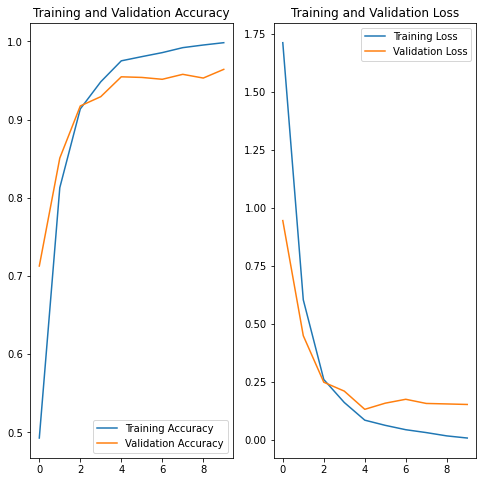

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Saving model without metadata

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('StaticSignLanguageModel.tflite', 'wb') as f:
  f.write(tflite_model)

#Adding metada to the model
Installing and importing necesary libraries

In [ ]:
!pip install tflite-support

from tflite_support import flatbuffers
from tflite_support import metadata as _metadata
from tflite_support import metadata_schema_py_generated as _metadata_fb

General information about model purpose and author

In [ ]:
# Creates model info.
model_meta = _metadata_fb.ModelMetadataT()
model_meta.name = "Mexican Static Sign Language Image Classifier"
model_meta.description = ("""Identify hand signs of Mexican Sign Languaje Alphabet""")
model_meta.version = "v1"
model_meta.author = "Oswaldo"

Input and Output information

In [ ]:
# Creates input info.
input_meta = _metadata_fb.TensorMetadataT()

# Creates output info.
output_meta = _metadata_fb.TensorMetadataT()


input_meta.name = "image"
input_meta.description = (
    "Input image to be classified. The expected image is {0} x {1}, with "
    "three channels (red, blue, and green) per pixel. Each value in the "
    "tensor is a single byte between 0 and 255.".format(180, 180))
input_meta.content = _metadata_fb.ContentT()
input_meta.content.contentProperties = _metadata_fb.ImagePropertiesT()
input_meta.content.contentProperties.colorSpace = (
    _metadata_fb.ColorSpaceType.RGB)
input_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.ImageProperties)
input_stats = _metadata_fb.StatsT()
input_stats.max = [255]
input_stats.min = [0]
input_meta.stats = input_stats

Label information

In [ ]:
# Creates output info.
output_meta = _metadata_fb.TensorMetadataT()
output_meta.name = "probability"
output_meta.description = "Probabilities of the 21 labels respectively."
output_meta.content = _metadata_fb.ContentT()
output_meta.content.content_properties = _metadata_fb.FeaturePropertiesT()
output_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_stats = _metadata_fb.StatsT()
output_stats.max = [1.0]
output_stats.min = [0.0]
output_meta.stats = output_stats
label_file = _metadata_fb.AssociatedFileT()
label_file.name = os.path.basename("labels.txt")
label_file.description = "Labels for objects that the model can recognize."
label_file.type = _metadata_fb.AssociatedFileType.TENSOR_AXIS_LABELS
output_meta.associatedFiles = [label_file]

In [ ]:
os.path.basename("labels.txt")

'labels.txt'

The following code combines the model information with the input and output information

In [ ]:
# Creates subgraph info.
subgraph = _metadata_fb.SubGraphMetadataT()
subgraph.inputTensorMetadata = [input_meta]
subgraph.outputTensorMetadata = [output_meta]
model_meta.subgraphMetadata = [subgraph]

b = flatbuffers.Builder(0)
b.Finish(
    model_meta.Pack(b),
    _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER)
metadata_buf = b.Output()

Once the metadata Flatbuffers is created, the metadata and the label file are written into the TFLite file via the populate method

In [ ]:
populator = _metadata.MetadataPopulator.with_model_file("StaticSignLanguageModel.tflite")
populator.load_metadata_buffer(metadata_buf)
populator.load_associated_files(["labels.txt"])
populator.populate()

#Visualizing metadata

In [ ]:
displayer = _metadata.MetadataDisplayer.with_model_file("StaticSignLanguageModel.tflite")
export_json_file = os.path.join("",
                    os.path.splitext("StaticSignLanguageModel")[0] + ".json")
json_file = displayer.get_metadata_json()
# Optional: write out the metadata as a json file
with open(export_json_file, "w") as f:
  f.write(json_file)